### 인테리어 이미지 업로드
업로드한 인테리어 이미지에서 5가지 대표색상 추출/RGB, HSV값 얻기

파일이름을 입력하시오 : sam7.jpeg


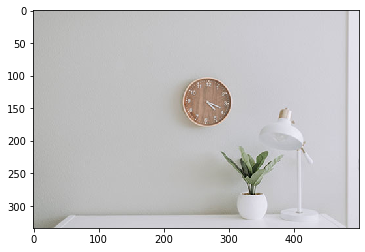

(167000, 3)
[0.49967066 0.39192814 0.00976048 0.05783832 0.0408024 ]


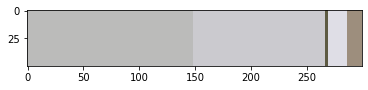

hsv 값과 빈도는 다음과 같다

[h 1 , s 1 , v 1 ] = [52, 0, 73] 0.4996706586826347
[h 2 , s 2 , v 2 ] = [249, 2, 81] 0.39192814371257484
[h 3 , s 3 , v 3 ] = [52, 28, 36] 0.009760479041916167
[h 4 , s 4 , v 4 ] = [247, 3, 90] 0.05783832335329341
[h 5 , s 5 , v 5 ] = [32, 20, 61] 0.04080239520958084


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image
import colorsys

#저장된 이미지 파일 이름을 input값으로 받음

a=input('파일이름을 입력하시오 : ')
image = mpimg.imread(a)
plt.imshow(image)
plt.show()

image = cv2.imread(a) 

# print(image.shape)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = image.reshape((image.shape[0] * image.shape[1], 3)) # height, width 통합
print(image.shape)

# 5개의 대표 색상 추출
k = 5
clt = KMeans(n_clusters = k)
clt.fit(image)

def centroid_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist

hist=centroid_histogram(clt)
print(hist)

def plot_colors(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0
    for (percent, color) in zip(hist, centroids):
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),color.astype("uint8").tolist(), -1)
        startX = endX
    return bar

bar = plot_colors(hist, clt.cluster_centers_)

plt.figure()
plt.axis("on")
plt.imshow(bar)
plt.show()

im = []
pix = np.array(im)
im.append(cv2.resize(image, (128,128), interpolation=cv2.INTER_CUBIC)) #img 사이즈 통일
# center=pix[64][64]
             
    
def revised_rgb_to_hsv(r, g, b):
    (h, s, v) = colorsys.rgb_to_hsv(r/255, g/255, b/255)
    h *= 360
    s *= 100
    v *= 100
    return h, s, v

print("hsv 값과 빈도는 다음과 같다\n")
i=-1
for center in clt.cluster_centers_:
    i+=1
    h,s,v=revised_rgb_to_hsv(center[0],center[1],center[2])
    h=int(h)
    s=int(s)
    v=int(v)
    print("[""h",i+1,',',"s",i+1,',',"v",i+1,"]","=",[h,s,v], hist[i])
   

### 명화 엑셀파일 불러오기

In [ ]:
import pandas as pd
df=pd.read_excel("crawled_painting.xlsx")
df

작가  \
0     William-Adolphe Bouguereau   
1     William-Adolphe Bouguereau   
2     William-Adolphe Bouguereau   
3     William-Adolphe Bouguereau   
4     William-Adolphe Bouguereau   
...                          ...   
3153       Aylmer Bourke Lambert   
3154              Thaddeus Welch   
3155                 J. S.Lawson   
3156              Pancrace Bessa   
3157        John Stevens Henslow   

                                                     제목  h1  s1  v1  h2  s2  \
0     A Young Girl Defending Herself against Eros (a...  29  31  42  32   1   
1                    Le Jour Des Morts (All Saints Day)  31  29  16  49   9   
2                          Prêtresse De Bacchus (1894)   38  19  58  31   4   
3                            The Bunch Of Grape (1868)   12  35  19  29  15   
4                              Virgin Comforter (1875)   26  32  43  34  17   
...                                                 ...  ..  ..  ..  ..  ..   
3153  Pinus rigida = Three-leaved Virginian pine. (1...  61   5  97  61  36   
3154                                    Poppies (1886)   56   8  84  44  45   
3155                   The Wild Pears of North Caucasus  31  34  95  35  56   
3156                              Untitled (1828-1835)   33   3  93  70  21   
3157                                      Grass (1840)   28  15  89  62  13   

      v2   h3  s3  v3                                   이미지url  
0     72   49  57  17  https://artvee.com/saconud/203137fg.jpg  
1     75   37  23  50  https://artvee.com/saconud/206314fg.jpg  
2     89   49  36  31  https://artvee.com/saconud/400938mt.jpg  
3     72   26  23  46  https://artvee.com/saconud/203161fg.jpg  
4     74    9  28  18  https://artvee.com/saconud/301328rg.jpg  
...   ..  ...  ..  ..                                      ...  
3153  32   50  23  64   https://artvee.com/saconud/50055pl.jpg  
3154  46   96  11  72   https://artvee.com/saconud/50295pl.jpg  
3155  72   42  44  46   https://artvee.com/saconud/50191pl.jpg  
3156  53  351  60  79   https://artvee.com/saconud/50275pl.jpg  
3157  65   77  26  46   https://artvee.com/saconud/50715pl.jpg  

[3158 rows x 12 columns]

In [ ]:
df.loc[:,['제목','이미지url']]
# print(url)

제목  \
0     A Young Girl Defending Herself against Eros (a...   
1                    Le Jour Des Morts (All Saints Day)   
2                          Prêtresse De Bacchus (1894)    
3                            The Bunch Of Grape (1868)    
4                              Virgin Comforter (1875)    
...                                                 ...   
3153  Pinus rigida = Three-leaved Virginian pine. (1...   
3154                                    Poppies (1886)    
3155                   The Wild Pears of North Caucasus   
3156                              Untitled (1828-1835)    
3157                                      Grass (1840)    

                                       이미지url  
0     https://artvee.com/saconud/203137fg.jpg  
1     https://artvee.com/saconud/206314fg.jpg  
2     https://artvee.com/saconud/400938mt.jpg  
3     https://artvee.com/saconud/203161fg.jpg  
4     https://artvee.com/saconud/301328rg.jpg  
...                                       ...  
3153   https://artvee.com/saconud/50055pl.jpg  
3154   https://artvee.com/saconud/50295pl.jpg  
3155   https://artvee.com/saconud/50191pl.jpg  
3156   https://artvee.com/saconud/50275pl.jpg  
3157   https://artvee.com/saconud/50715pl.jpg  

[3158 rows x 2 columns]

### 5가지 대표 색상별 명화 추천 받기

유사색의 명화 추천 : 
Portrait of Pierre Sériziat, David’s brother-in-law (1795) 


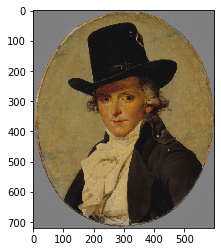

The sailor’s family (1826) 


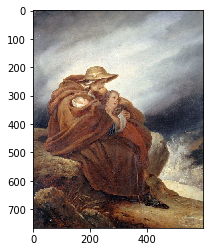

Secrets


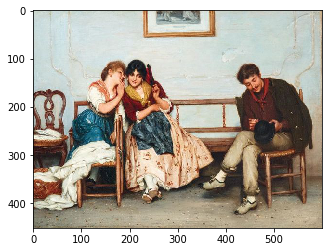

Jonah (c. 1896-1902) 


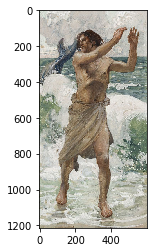

Study Head of a Young Man Looking Upwards. St Sebastian (1614 – 1641) 


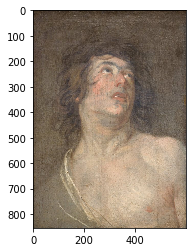

The Tribute


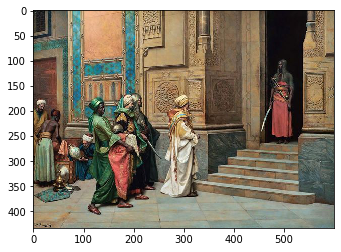

Greenland Falcon (1780) 


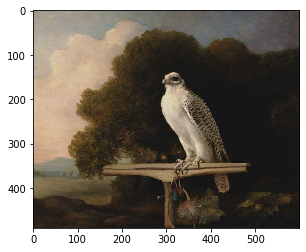

Portrait of a Woman (ca. 1750) 
In the Dining Room (1886) 


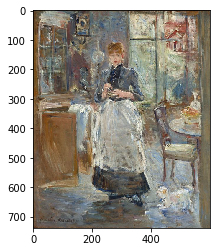

Saint Jerome in the Wilderness (c. 1575-1585) 


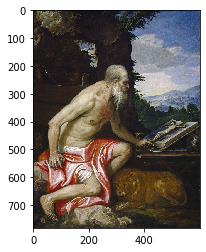

River Landscape with Cows (1645-1650) 


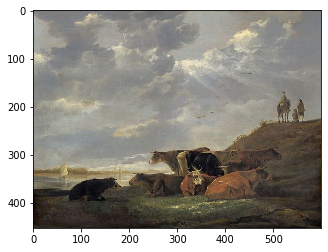

Grundplan af tilskuersalen i Komediehuset (1701 – 1754) 


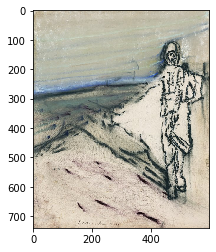

Composition (1921) 


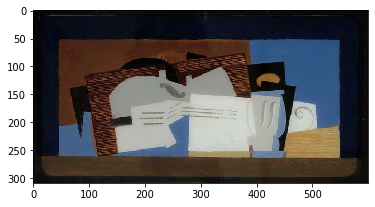

Sarah Trumbull (Sarah Hope Harvey) on Her Deathbed (1824) 


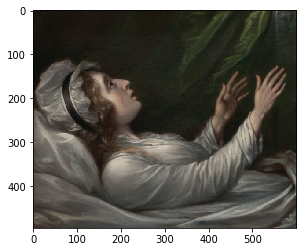

Woman with a mirror (1938) 


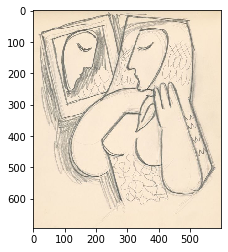

Aurora and Cephalus (1769) 


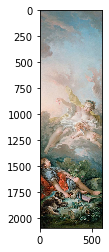

Hot Springs of Gardiner’s River, Yellowstone (ca. 1875) 


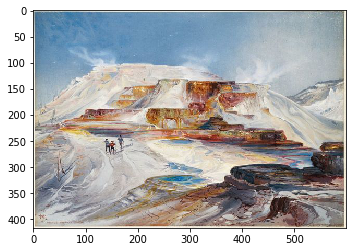

Anxiety (1896) 


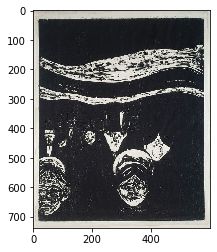

The Resurrection (1886-1894) 


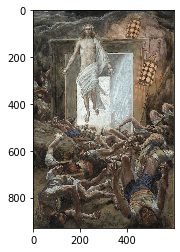

Goat herder (1936–1937) 


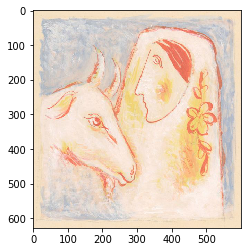

The Louvre, Morning, Sunlight (1901) 


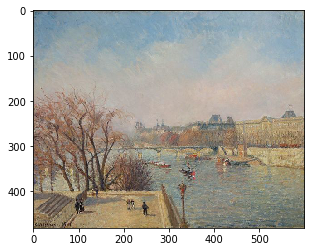

View from Montmartre (1886) 


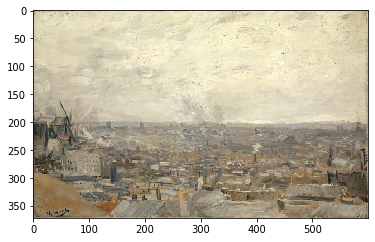

Mère Et Ses Enfants (1883) 


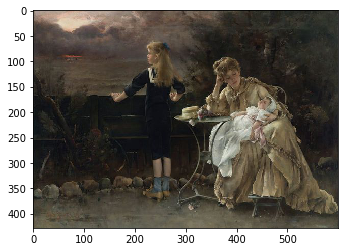

After the Ball (1874) 


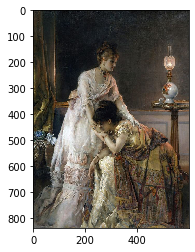

Innocence (1763) 


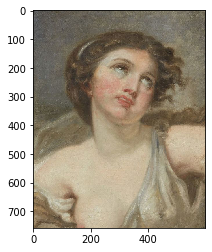

The Judgment Of Paris


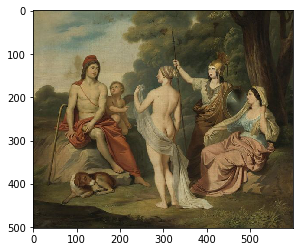

Portrait of Louise-Antoinette-Scholastique Guéhéneuc, Madame la Maréchale Lannes, Duchesse de Montebello, with her Children (1814) 


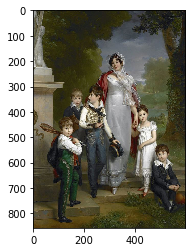

Arion (1891) 


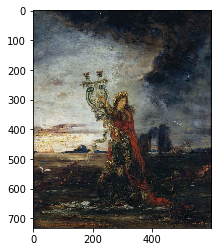

Portrait Of Giovinetta Errazuriz (1892) 


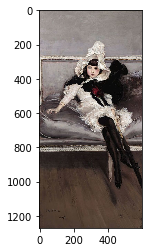

Le Jugement De Paris
Dans Les Blés


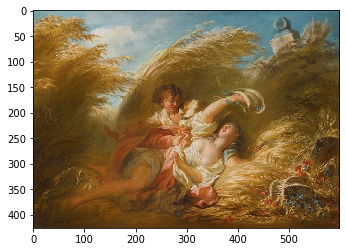

Saint Francis Receiving The Stigmata


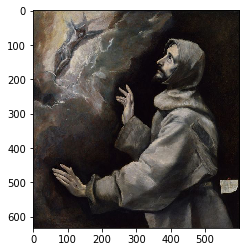

The Sisters (1869) 


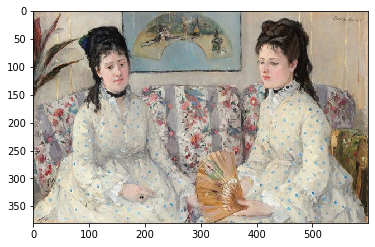

Toilette de promenade (1913) 


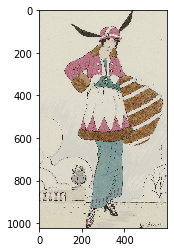

The Field Of Battle


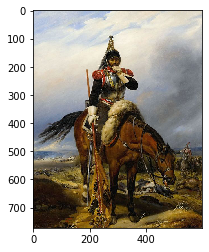

Goat herder (1936–1937) 


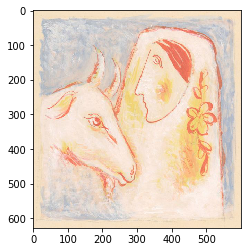

Dynamic Suprematism (1916) 


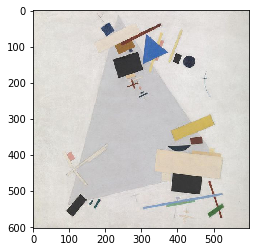

Echo (1874) 


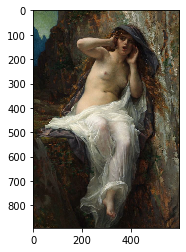

Pandora (1873) 


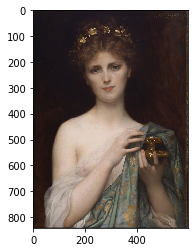

The Crucified Christ Adored By Saints Dominic And Catherine Of Siena


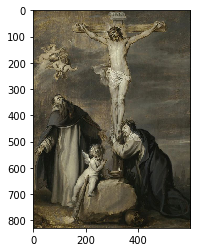

Diana Returning from the Hunt (1745) 


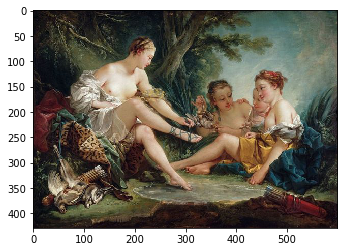

Miss Elizabeth Milward (1770) 


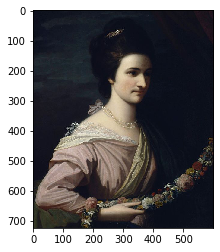

Study for ‘Greek Girl Dancing’ (c. 1867) 


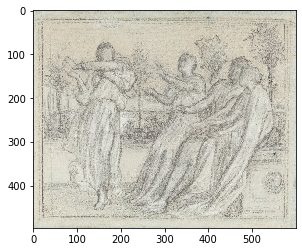

A River God and Two Classical Sculptures (1775-80) 


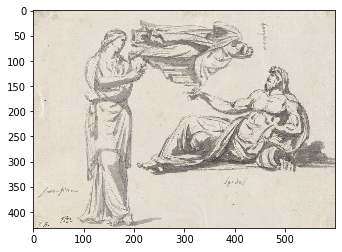

The Judgment Of Paris


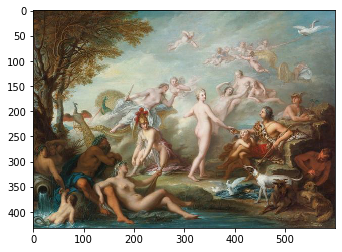

Saint Jerome (c. 1610-1614) 


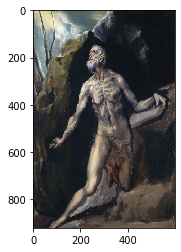

Crescent of Houses II (1915) 


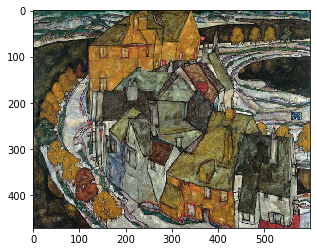


보색의 명화 추천 : 

단색의 명화 추천 : 
Lady Elizabeth Delmé and Her Children (1777-1779) 


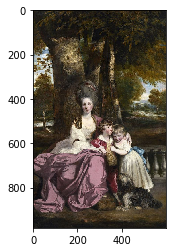

Ora Pro Nobis (1903) 


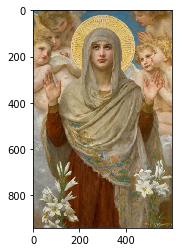

Faust And Marguerite In The Garden (1846) 


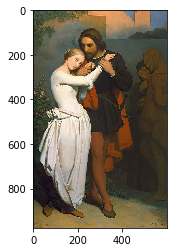

Relay Hunting (1887) 


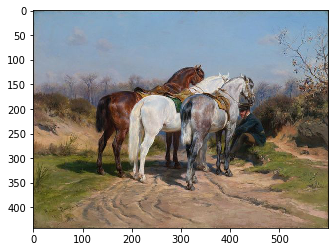

Bacchus and Pomone


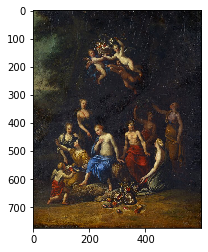

Louise Harduin (1831) 


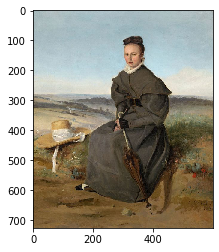

Mother And Child (c. 1875–80) 


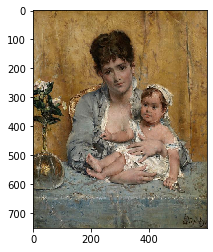

Leo Manso, recent paintings and collages (1960) 


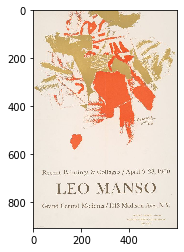

Les Vainqueurs De La Bastille Devant L’hôtel De Ville, Le 14 Juillet 1789 (1830-1838) 


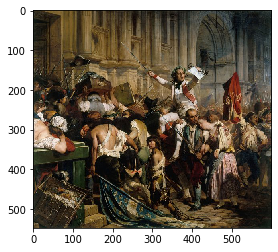

La Villa Des Falaises À Sainte-Adresse (1884) 


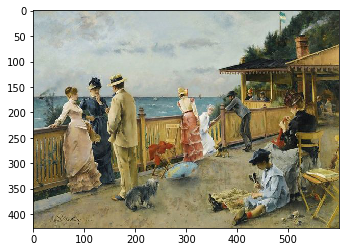

Mary Magdalene At The Tomb (1875) 


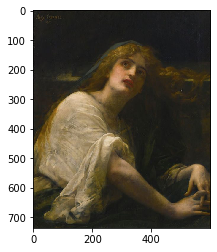

Hamlet And Ophelia (1873) 


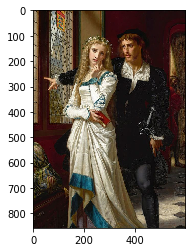

Negative blood during treatment does not mean cure Continue treatment until discharged (1936-1939) 


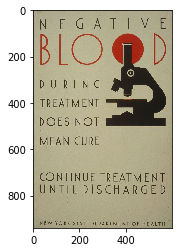

In [ ]:
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
import numpy as np

df_analog=[]
df_compl=[]
df_mono=[]

df_analog2=[]
df_compl2=[]
df_mono2=[]

for i in range(1,4): 
    for center in clt.cluster_centers_:

        h,s,v=revised_rgb_to_hsv(center[0],center[1],center[2])
        h=int(h)
        s=int(s)
        v=int(v)

        #비슷한 색감의 명화 추천
        ## roomcolor_analog(비슷한 색감) : h는 +-30도(!=0) (AND) s는 동일, v는 +-5 

        #보색의 명화 추천
        ## roomcolor_compl(보색): h는 +-180도 (AND) s와v는 +-5

        #단색의 명화 추천
        ## roomcolor_mono(단색) : h는 동일 (AND) s는 +-10, v는 고려하지 않음

        roomcolor_analog= (abs(df['h'+str(i)]-h)!=0)&(abs(df['h'+str(i)]-h)<=30)&(abs(df['s'+str(i)]-s)==0)&(abs(df['v'+str(i)]-v)<=5)
        roomcolor_compl=(abs(df['h'+str(i)]-h)==180)&(abs(df['s'+str(i)]-s)<=5)&(abs(df['v'+str(i)]-v)<=5)
        roomcolor_mono=(df['h'+str(i)]==h)&(abs(df['s'+str(i)]-s)==30)

        df_analog.append(df[roomcolor_analog]['제목'].values.tolist())  #유사색-추천받은 명화 '제목' list형식으로 append
        df_compl.append(df[roomcolor_compl]['제목'].values.tolist())  #보색-추천받은 명화 '제목' list형식으로 append
        df_mono.append(df[roomcolor_mono]['제목'].values.tolist()) #단색-추천받은 명화 '제목' list형식으로 append
        
        df_analog2.append(df[roomcolor_analog]['이미지url'].values.tolist())  #유사색-추천받은 명화 '이미지url' list형식으로 append
        df_compl2.append(df[roomcolor_compl]['이미지url'].values.tolist())  #보색-추천받은 명화 '이미지url' list형식으로 append
        df_mono2.append(df[roomcolor_mono]['이미지url'].values.tolist()) #단색-추천받은 명화 '이미지url' list형식으로 append


  
print("유사색의 명화 추천 : ")
for i in range(0,15):
    for j in range(0,5):
        try:

            print(df_analog[i][j])
            url=df_analog2[i][j]
    
            image=Image.open(urllib.request.urlopen(url))
            im_array = np.asarray(image)
            plt.imshow(im_array)
            plt.show()
           
        except:
            None
print("="*50)

print("\n보색의 명화 추천 : ")
for i in range(0,15):
    for j in range(0,5):
        try:

            print(df_compl[i][j])
            url=df_compl2[i][j]
            image=Image.open(urllib.request.urlopen(url))
            im_array = np.asarray(image)
            plt.imshow(im_array)
            plt.show()
 
        except:
            None
print("="*50)
            
print("\n단색의 명화 추천 : ")
for i in range(0,15):
    for j in range(0,5):
        try:

            print(df_mono[i][j])
            url=df_mono2[i][j]
            image=Image.open(urllib.request.urlopen(url))
            im_array = np.asarray(image)
            plt.imshow(im_array)
            plt.show()

        except:
            None

            